# Logistic Regression on Auto Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

In [5]:
df = pd.read_csv("C:\\Users\\HP\\Documents\\Statistical Machine Learning\\archive\\auto-mpg.csv")
df.head() # to view the 1st 5 rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
# dropping the rows with "?"
df1 = df.drop(df[df.values == '?'].index)

In [9]:
# changing the datatype of th column to float from string
df1['horsepower'] = df1['horsepower'].astype(float)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [8]:
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Converting the MPG variable to a categorical variable

In [11]:
mpg1 = (df1['mpg'] > df1['mpg'].median()).astype(np.float64)
df_n = pd.concat([df1, mpg1.rename('mpg01')], axis=1).drop('mpg', axis=1)

In [12]:
df_n.sample(5)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg01
173,4,119.0,97.0,2545,17.0,75,3,datsun 710,1.0
292,8,360.0,150.0,3940,13.0,79,1,chrysler lebaron town @ country (sw),0.0
233,4,97.0,78.0,1940,14.5,77,2,volkswagen rabbit custom,1.0
219,4,122.0,96.0,2300,15.5,77,1,plymouth arrow gs,1.0
61,4,122.0,86.0,2226,16.5,72,1,ford pinto runabout,0.0


In [11]:
df_n.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin', 'car name', 'mpg01'],
      dtype='object')

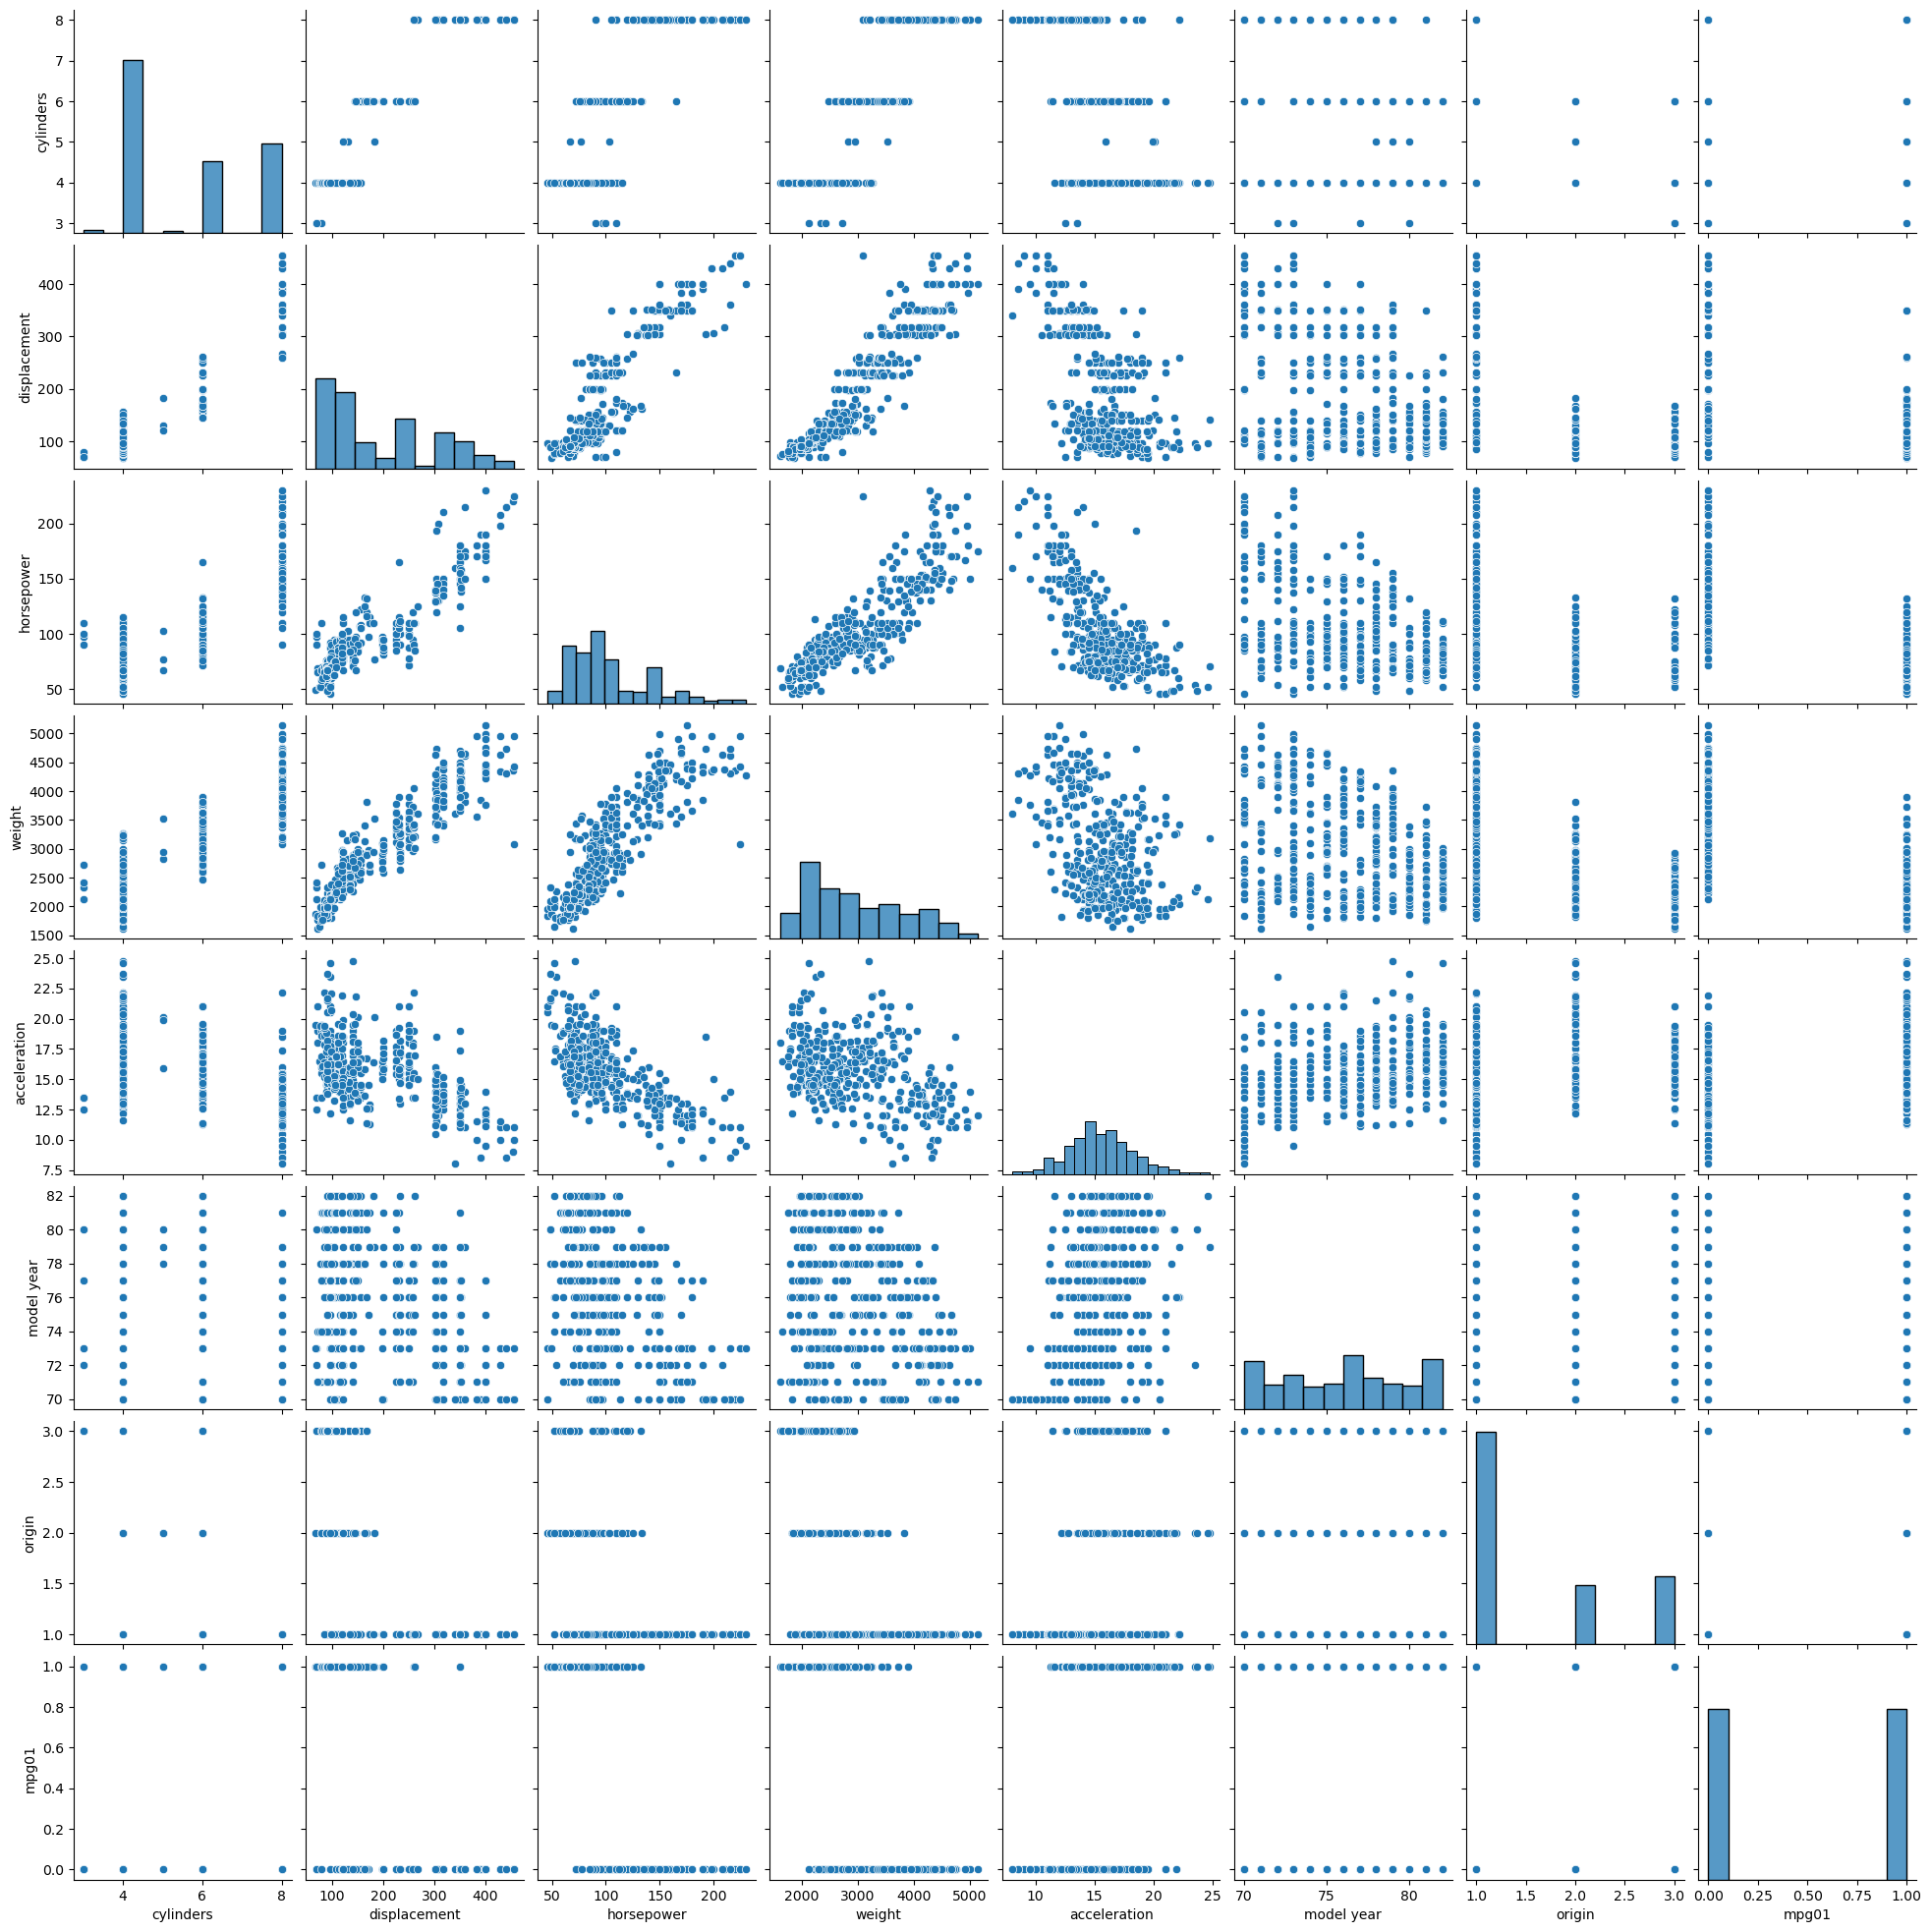

In [31]:
sns.pairplot(df_n)

* Mpg appears to be strongly negatively correlated with weight, horsepower and displacement. The distribution of mpg is skewed.
* The relationships between displacement, horsepower, and weight appear to be linear and they are positively correlated.
* Horsepower is positively correlated with weight and negatively correlated with acceleration.
* The relationship between acceleration and other features seems weekly correlated. Acceleration has a normal distribution.
* Maximum cars have 4 cylinders followed by 8, 6, 5 and 3 cylinders.


## Correlation matrix

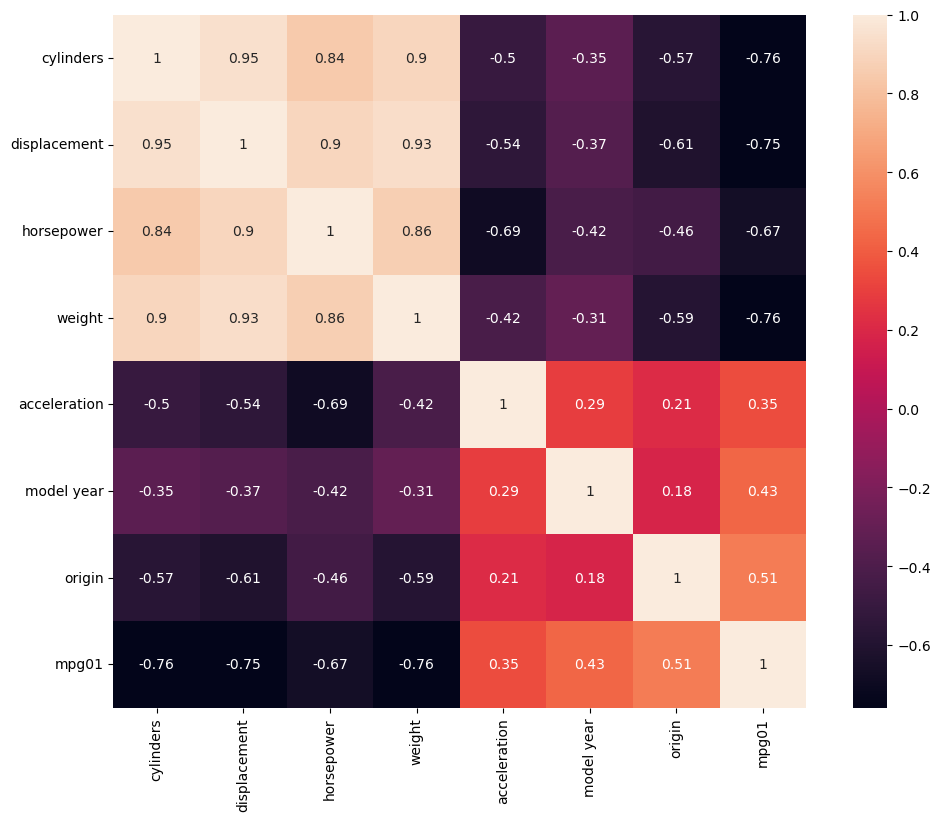

In [36]:
corr_matrix = df_n.corr()
fig, ax     = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

* MPG is modarately positively correlated with accelaration.
* MPG is modarately negatively correlated with horsepower.
* MPG is strongly negatively correlated with cylinder, displacement and weight.

### Split the data into a training set and a test set.

In [12]:
X = df_n[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df_n[['mpg01']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
X_train1 = sm.add_constant(X_train)
X_test1 = sm.add_constant(X_test)

In [15]:
logit_model = sm.Logit(y_train, X_train1).fit()

Optimization terminated successfully.
         Current function value: 0.250397
         Iterations 9


In [16]:
print(logit_model.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.638     
Dependent Variable: mpg01            AIC:              149.2176  
Date:               2023-03-28 20:20 BIC:              170.8964  
No. Observations:   274              Log-Likelihood:   -68.609   
Df Model:           5                LL-Null:          -189.74   
Df Residuals:       268              LLR p-value:      2.5124e-50
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         11.6570    3.2797   3.5543  0.0004   5.2289  18.0851
cylinders     -0.5282    0.4399  -1.2006  0.2299  -1.3903   0.3340
displacement  -0.0052    0.0103  -0.5078  0.6116  -0.0253   0.0149
horsepower    -0.0159    0.025

From the p values for the different predictors, we observe that only the predictor weight is significant in predicting the mpg.

In [17]:
logit_model1 = LogisticRegression().fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
logit_model1.intercept_, logit_model1.coef_

(array([11.48623694]),
 array([[-0.44382382, -0.00667481, -0.01671897, -0.00260113,  0.04882679]]))

## Predicted values of mpg for the training and testing set

In [19]:
y_train_pred = logit_model1.predict(X_train)
y_test_pred = logit_model1.predict(X_test)

In [20]:
y_train_pred_prob = logit_model1.predict_proba(X_train)[:,1]
y_test_pred_prob = logit_model1.predict_proba(X_test)[:,1]

## Confusion matrix for training set

In [21]:
cm_train = metrics.confusion_matrix(y_train, y_train_pred, labels = logit_model1.classes_)
print("The confusion matrix for training set is:")
print(cm_train)

The confusion matrix for training set is:
[[126  16]
 [  8 124]]


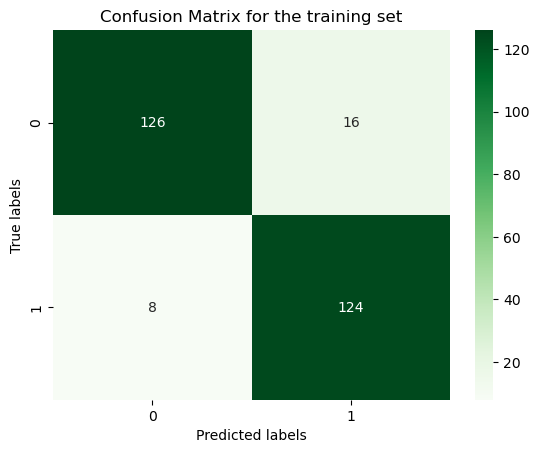

In [22]:
ax= plt.subplot()
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax, cmap = 'Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for the training set'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

## Confusion matrix for test set

In [23]:
cm_test = metrics.confusion_matrix(y_test, y_test_pred)
print("The confusion matrix for testing set is:")
print(cm_test)

The confusion matrix for testing set is:
[[45  9]
 [ 7 57]]


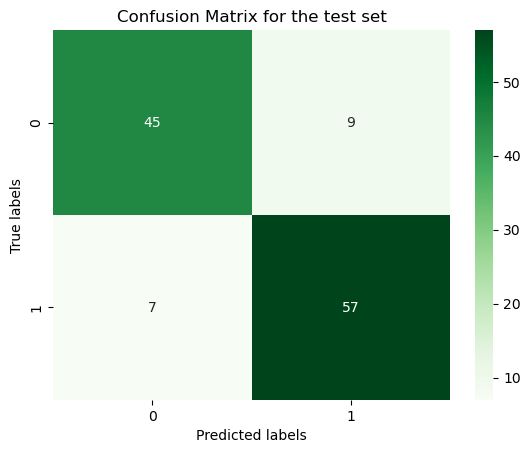

In [24]:
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax, cmap = 'Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for the test set'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [25]:
precision_train = metrics.precision_score(y_train, y_train_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)

print("The precision for the training and testing set are given as:", precision_train, ", ", precision_test)

The precision for the training and testing set are given as: 0.8857142857142857 ,  0.8636363636363636


In [26]:
recall_train = metrics.recall_score(y_train, y_train_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)

print("The recall for the training and testing set are given as:", recall_train, ", ", recall_test)

The recall for the training and testing set are given as: 0.9393939393939394 ,  0.890625


In [27]:
f1_train = metrics.f1_score(y_train, y_train_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

print("The f1_score for the training and testing set are given as:", f1_train, ", ", f1_test)

The f1_score for the training and testing set are given as: 0.9117647058823529 ,  0.8769230769230768


In [28]:
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)

print("The accuracy for the training and testing set are given as:", accuracy_train, ", ", accuracy_test)

The accuracy for the training and testing set are given as: 0.9124087591240876 ,  0.864406779661017


# ROC curve

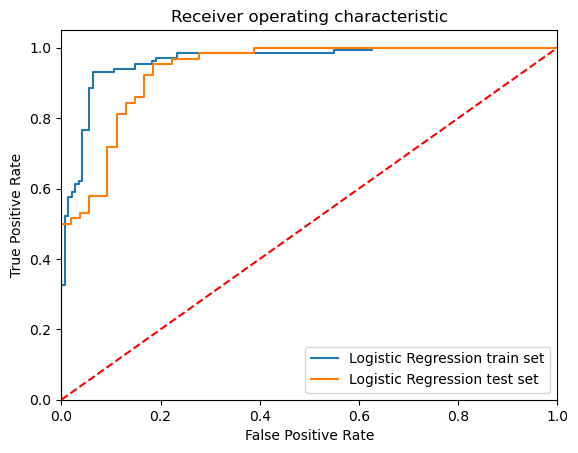

In [29]:
fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train, logit_model1.predict_proba(X_train)[:,1])
fpr_te, tpr_te, thresholds_te = roc_curve(y_test, logit_model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_tr, tpr_tr, label='Logistic Regression train set')
plt.plot(fpr_te, tpr_te, label='Logistic Regression test set')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Area under the ROC corve

In [30]:
logit_roc_auc_train = roc_auc_score(y_train, logit_model1.predict(X_train))
logit_roc_auc_test = roc_auc_score(y_test, logit_model1.predict(X_test))

print("The area under the ROC curve for the training and testting set are: ", logit_roc_auc_train, ", ", logit_roc_auc_test)

The area under the ROC curve for the training and testting set are:  0.9133589415279557 ,  0.8619791666666667
